In [19]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn
import os
import warnings
warnings.simplefilter('ignore')


#DATASOURCE https://www.ngdc.noaa.gov/nndc/struts/form?t=101650&s=35&d=35
print(os.listdir("./earthquakedata"))


['eqdata.csv']


In [20]:
df = pd.read_csv('./earthquakedata/eqdata.csv')
df.head()

,I_D,FLAG_TSUNAMI,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,FOCAL_DEPTH,EQ_PRIMARY,...,TOTAL_MISSING,TOTAL_MISSING_DESCRIPTION,TOTAL_INJURIES,TOTAL_INJURIES_DESCRIPTION,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_DAMAGE_DESCRIPTION,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DESTROYED_DESCRIPTION,TOTAL_HOUSES_DAMAGED,TOTAL_HOUSES_DAMAGED_DESCRIPTION
0,4333,NaN,1965,1,1,21.0,38.0,29.2,10.0,5.5,...,NaN,NaN,350.0,3.0,2.00,2.0,2500.0,4.0,NaN,NaN
1,8074,NaN,1965,1,12,17.0,18.0,9,10.0,5.5,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,3.0,NaN,NaN
2,4334,Tsu,1965,1,24,0.0,11.0,12.1,6.0,7.6,...,NaN,NaN,NaN,NaN,NaN,2.0,3000.0,4.0,NaN,NaN
3,4337,Tsu,1965,2,4,5.0,1.0,21.6,36.0,8.7,...,NaN,NaN,NaN,NaN,0.01,1.0,NaN,NaN,NaN,NaN
4,4340,NaN,1965,2,10,16.0,9.0,,52.0,5.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df1=df[['I_D','FLAG_TSUNAMI','FOCAL_DEPTH','EQ_PRIMARY','INTENSITY','COUNTRY','STATE','LOCATION_NAME','LATITUDE','LONGITUDE']]
df1.head()

,I_D,FLAG_TSUNAMI,FOCAL_DEPTH,EQ_PRIMARY,INTENSITY,COUNTRY,STATE,LOCATION_NAME,LATITUDE,LONGITUDE
0,4333,NaN,10.0,5.5,NaN,ALGERIA,NaN,ALGERIA: M'SILA,35.70,4.40
1,8074,NaN,10.0,5.5,7.0,CHINA,NaN,CHINA: SHANXI PROVINCE,35.00,111.63
2,4334,Tsu,6.0,7.6,NaN,INDONESIA,NaN,INDONESIA: SANANA ISLAND,-2.40,126.10
3,4337,Tsu,36.0,8.7,6.0,USA,AK,ALASKA: ALEUTIAN ISLANDS: RAT ISLANDS,51.29,178.55
4,4340,NaN,52.0,5.1,NaN,IRAN,NaN,IRAN: NW,37.60,47.10


In [22]:
df2=df[['YEAR','MONTH','DAY']]
df2.head()

,YEAR,MONTH,DAY
0,1965,1,1
1,1965,1,12
2,1965,1,24
3,1965,2,4
4,1965,2,10


In [23]:
# df = pd.DataFrame({'Year': ['2014', '2015'], 'quarter': ['q1', 'q2']})
# df['period'] = df[['Year', 'quarter']].apply(lambda x: ''.join(x), axis=1)
# df

In [24]:
df2['Date']=df2[['MONTH','DAY','YEAR']].apply(lambda x: '/'.join(x.astype(str)),axis=1)
df2['Date'] = pd.to_datetime(df2['Date'])
#print(set(df['Type']))
#df.head()
df2.head()


,YEAR,MONTH,DAY,Date
0,1965,1,1,1965-01-01
1,1965,1,12,1965-01-12
2,1965,1,24,1965-01-24
3,1965,2,4,1965-02-04
4,1965,2,10,1965-02-10


In [25]:
df=df1.assign(DATE=df2['Date'])
df


,I_D,FLAG_TSUNAMI,FOCAL_DEPTH,EQ_PRIMARY,INTENSITY,COUNTRY,STATE,LOCATION_NAME,LATITUDE,LONGITUDE,DATE
0,4333,NaN,10.0,5.5,NaN,ALGERIA,NaN,ALGERIA: M'SILA,35.700,4.400,1965-01-01
1,8074,NaN,10.0,5.5,7.0,CHINA,NaN,CHINA: SHANXI PROVINCE,35.000,111.630,1965-01-12
2,4334,Tsu,6.0,7.6,NaN,INDONESIA,NaN,INDONESIA: SANANA ISLAND,-2.400,126.100,1965-01-24
3,4337,Tsu,36.0,8.7,6.0,USA,AK,ALASKA: ALEUTIAN ISLANDS: RAT ISLANDS,51.290,178.550,1965-02-04
4,4340,NaN,52.0,5.1,NaN,IRAN,NaN,IRAN: NW,37.600,47.100,1965-02-10
5,6411,Tsu,36.0,7.0,NaN,CHILE,NaN,CHILE: NORTHERN,-25.670,-70.630,1965-02-23
6,4341,Tsu,18.0,6.3,NaN,GREECE,NaN,"GREECE: ALONISOS, SKOPELOS",39.400,24.000,1965-03-09
7,4343,NaN,219.0,7.3,7.0,AFGHANISTAN,NaN,AFGHANISTAN,36.300,70.700,1965-03-14
8,6412,Tsu,58.0,6.0,6.0,CHILE,NaN,CHILE: CENTRAL,-31.810,-71.260,1965-03-22
9,4345,NaN,61.0,7.3,NaN,CHILE,NaN,CHILE: CENTRAL,-32.400,-71.200,1965-03-28


In [26]:
df= df[['DATE', 'LATITUDE', 'LONGITUDE', 'EQ_PRIMARY', 'FLAG_TSUNAMI','COUNTRY','INTENSITY']]
df=df.rename(index=str,columns={'EQ_PRIMARY':'MAGNITUDE','FLAG_TSUNAMI':'TYPE'})
df.head()


,DATE,LATITUDE,LONGITUDE,MAGNITUDE,TYPE,COUNTRY,INTENSITY
0,1965-01-01,35.70,4.40,5.5,NaN,ALGERIA,NaN
1,1965-01-12,35.00,111.63,5.5,NaN,CHINA,7.0
2,1965-01-24,-2.40,126.10,7.6,Tsu,INDONESIA,NaN
3,1965-02-04,51.29,178.55,8.7,Tsu,USA,6.0
4,1965-02-10,37.60,47.10,5.1,NaN,IRAN,NaN


In [27]:
df['TYPE'] = df['TYPE'].fillna('EarthQuake')
df.head()

,DATE,LATITUDE,LONGITUDE,MAGNITUDE,TYPE,COUNTRY,INTENSITY
0,1965-01-01,35.70,4.40,5.5,EarthQuake,ALGERIA,NaN
1,1965-01-12,35.00,111.63,5.5,EarthQuake,CHINA,7.0
2,1965-01-24,-2.40,126.10,7.6,Tsu,INDONESIA,NaN
3,1965-02-04,51.29,178.55,8.7,Tsu,USA,6.0
4,1965-02-10,37.60,47.10,5.1,EarthQuake,IRAN,NaN


In [28]:
df.to_csv('data_output.csv',sep=',')

In [29]:
print('Size of the Dataframe', df.shape)
eq = df[df['TYPE'] == 'EarthQuake']
tsu = df[df['TYPE'] != 'EarthQuake']
eq.head()


Size of the Dataframe (2183, 7)


,DATE,LATITUDE,LONGITUDE,MAGNITUDE,TYPE,COUNTRY,INTENSITY
0,1965-01-01,35.7,4.40,5.5,EarthQuake,ALGERIA,NaN
1,1965-01-12,35.0,111.63,5.5,EarthQuake,CHINA,7.0
4,1965-02-10,37.6,47.10,5.1,EarthQuake,IRAN,NaN
7,1965-03-14,36.3,70.70,7.3,EarthQuake,AFGHANISTAN,7.0
9,1965-03-28,-32.4,-71.20,7.3,EarthQuake,CHILE,NaN


In [30]:
eq.pivot_table(index = "TYPE", values = "MAGNITUDE", aggfunc=len)

,MAGNITUDE
TYPE,
EarthQuake,1685.0


In [31]:
minimum = eq["MAGNITUDE"].min()
maximum = eq["MAGNITUDE"].max()
average = eq["MAGNITUDE"].mean()

print("Minimum:", minimum)
print("Maximum:",maximum)
print("Mean",average)

Minimum: 1.6
Maximum: 8.3
Mean 5.825372245384157


Magnitude   Number of Occurence
5-6         652.0
6-7         526.0
7-8         213.0
8-9         3.0
9-10         0.0


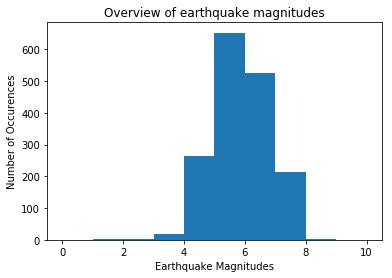

In [32]:
(n,bins, patches) = plt.hist(eq["MAGNITUDE"], range=(0,10), bins=10)
plt.xlabel("Earthquake Magnitudes")
plt.ylabel("Number of Occurences")
plt.title("Overview of earthquake magnitudes")

print("Magnitude" +"   "+ "Number of Occurence")
for i in range(5, len(n)):
    print(str(i)+ "-"+str(i+1)+"         " +str(n[i]))

In [33]:
eq["YEAR"] = eq['DATE'].dt.year
eq.head()

,DATE,LATITUDE,LONGITUDE,MAGNITUDE,TYPE,COUNTRY,INTENSITY,YEAR
0,1965-01-01,35.7,4.40,5.5,EarthQuake,ALGERIA,NaN,1965
1,1965-01-12,35.0,111.63,5.5,EarthQuake,CHINA,7.0,1965
4,1965-02-10,37.6,47.10,5.1,EarthQuake,IRAN,NaN,1965
7,1965-03-14,36.3,70.70,7.3,EarthQuake,AFGHANISTAN,7.0,1965
9,1965-03-28,-32.4,-71.20,7.3,EarthQuake,CHILE,NaN,1965


Maximum 69
Minimum 6


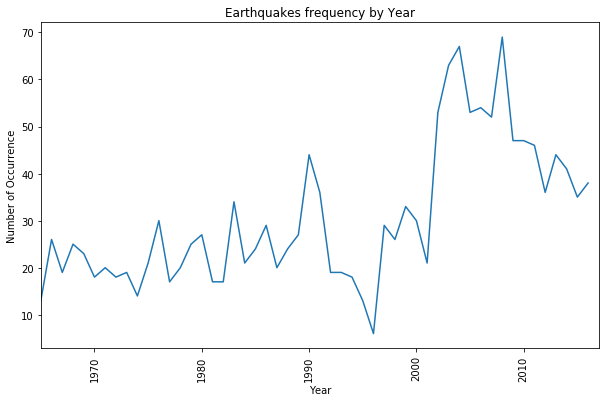

In [34]:
year_occurrence = eq.groupby("YEAR").groups


year = [i for i in range(1965,2017)]
occurrence = []

for i in range(len(year)):
    val = year_occurrence[year[i]]
    occurrence.append(len(val))

maximum = max(occurrence)
minimum = min(occurrence)
print("Maximum",maximum)
print("Minimum",minimum)

fig = plt.figure(figsize=(10,6))
plt.plot(year,occurrence)
plt.xticks(rotation = 90)
plt.xlabel("Year")
plt.ylabel("Number of Occurrence")
plt.title("Earthquakes frequency by Year")
plt.xlim(1965,2017)
plt.show()

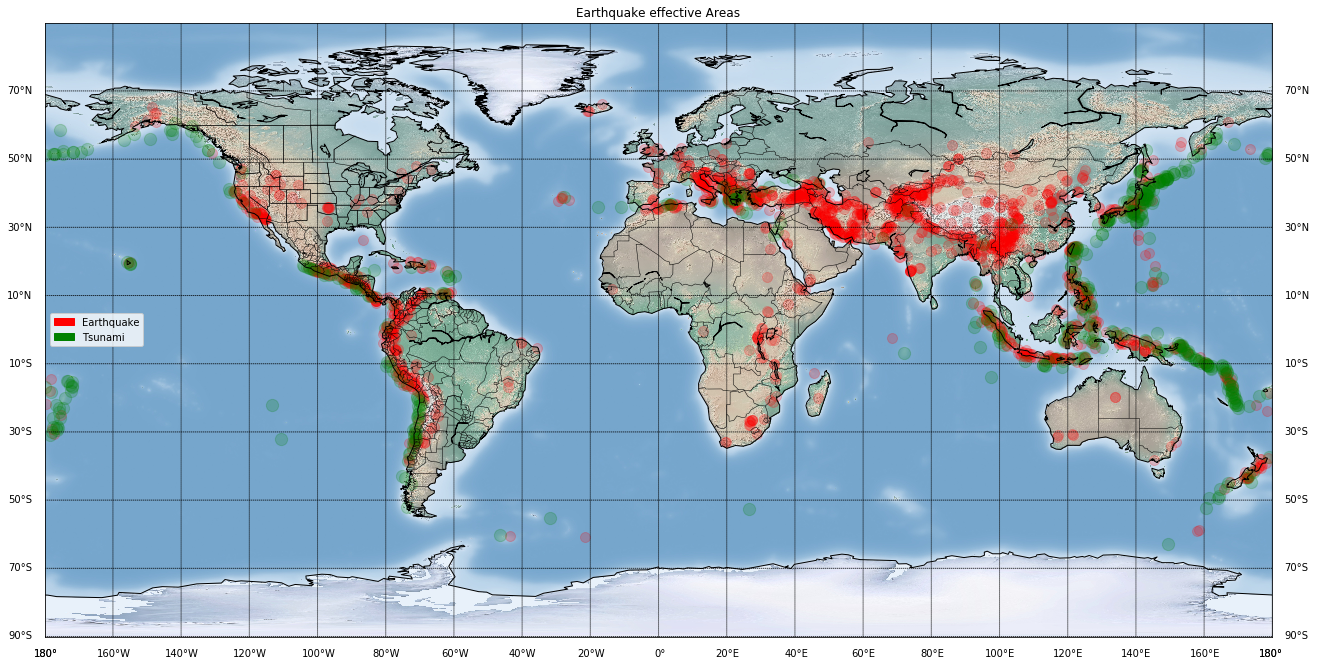

In [35]:
import os
os.environ["PROJ_LIB"] = "C:\\users\\richa\\Anaconda3\\Library\\share"; #fixr
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


fig = plt.figure(figsize = (22, 20))
worldmap = Basemap()
# LATTITUDE and LONGITUDE earthquakes 
longitudes = eq['LONGITUDE'].tolist()
latitudes = eq['LATITUDE'].tolist()
x_eq, y_eq = worldmap(longitudes, latitudes)
# LATTITUDE and LONGITUDE for Tsunamis created by earthquakes
longitudes = tsu['LONGITUDE'].tolist()
latitudes = tsu['LATITUDE'].tolist()
x_oth, y_oth = worldmap(longitudes, latitudes)
plt.title('Earthquake effective Areas')
worldmap.drawcoastlines()
worldmap.shadedrelief()
worldmap.drawcountries()
worldmap.drawstates()
worldmap.scatter(x_eq, y_eq, s = 100, c = 'r', alpha = 0.2)
worldmap.scatter(x_oth, y_oth, s = 150, c = 'g', alpha = 0.2)
# draw parallels
worldmap.drawparallels(np.arange(-90,90,20),labels=[1,1,0,1])
# draw meridians
worldmap.drawmeridians(np.arange(-180,180,20),labels=[1,1,0,1])
#ax = plt.gca()
red_patch = mpatches.Patch(color='r', label='Earthquake')
green_patch = mpatches.Patch(color='g', label='Tsunami')
plt.legend(handles=[red_patch,green_patch],)
plt.show()

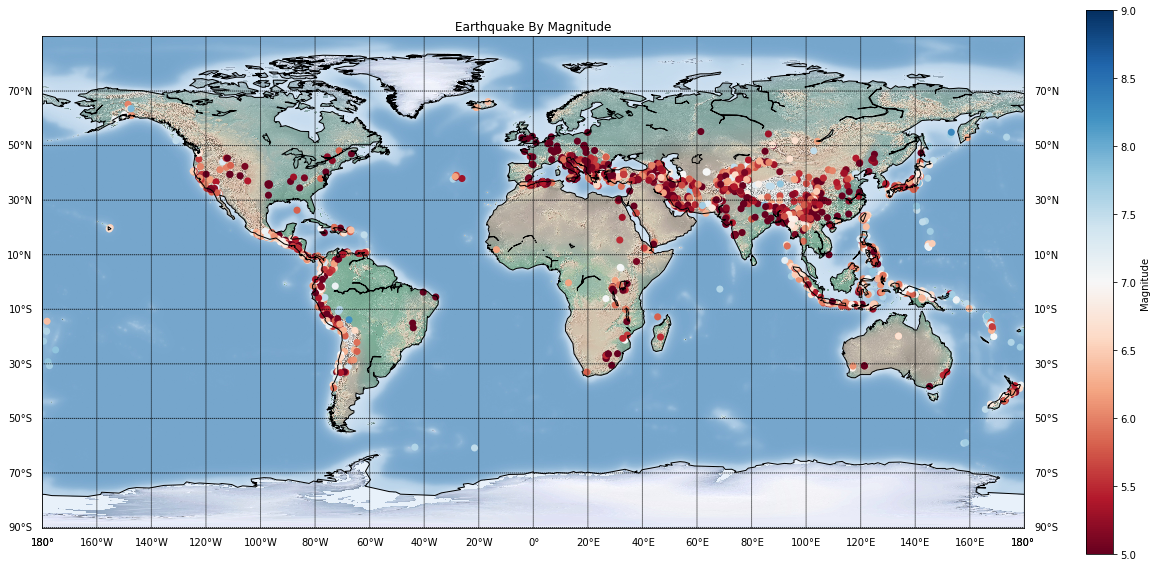

In [36]:
fig = plt.figure(figsize = (22, 20))
worldmap = Basemap()
worldmap.drawcoastlines()
worldmap.shadedrelief()
plt.title('Earthquake By Magnitude')
# draw parallels
worldmap.drawparallels(np.arange(-90,90,20),labels=[1,1,0,1])
# draw meridians
worldmap.drawmeridians(np.arange(-180,180,20),labels=[1,1,0,1])
cmap = plt.get_cmap('RdBu')

colorscatter =worldmap.scatter(x_eq, y_eq, s =50 , c = eq['MAGNITUDE'], vmin=5, vmax =9, cmap=cmap, edgecolors='none')
clrbar = plt.colorbar(colorscatter, shrink = .5)
clrbar.set_label('Magnitude')
plt.show()